In [1]:
import pandas as pd
import numpy as np

#### First, load the downloaded data and name it as "my_df"

In [2]:
#Now load the downloaded dataset as a pandas DataFrame
my_df = pd.read_csv("Airline Dataset Updated - v2.csv")
my_df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled


### `DATA CLEANING`

In [3]:
#Now try to check how clean the data is
my_df.isna().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [4]:
#No "NAN" data, so we proceed to get basic information
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
#Set passengers id as the index
my_df.set_index("Passenger ID", inplace = True)

In [6]:
# Create a column to hold both First name and last name
my_df["Name"] = my_df["First Name"] + " " + my_df["Last Name"]

In [7]:
#Now move the Name column to the 1st column
first = my_df.pop("Name")
my_df.insert(0, 'Name', first)

In [8]:
# First repalace "-" with "/" in the Departure date column to make the data uniform
my_df["Departure Date"] = my_df["Departure Date"].str.replace("-", "/")

In [9]:
#Replace Oceania in Continents to Australia to aid understanding
my_df["Continents"] = my_df["Continents"].str.replace("Oceania", "Australia")

In [10]:
#Split the departure date into Month, Day and Year
my_df[["Month", "Day", "Year"]] = my_df["Departure Date"].str.split("/", expand = True)

In [11]:
#Now drop the First name, last name and the departure date columns
del my_df["First Name"]
del my_df["Last Name"]
del my_df["Departure Date"]

In [12]:
#Now move the Day, month and Year to the 11th, 12th, and 14thh columns
sec = my_df.pop("Year")
my_df.insert(10, 'Year', sec)
dec = my_df.pop("Month")
my_df.insert(10, 'Month', dec)
fec = my_df.pop("Day")
my_df.insert(10, 'Day', fec)

In [13]:
#To change the month from numbers to month name
my_df["Month"] = my_df["Month"].str.replace("10", "October")
my_df["Month"] = my_df["Month"].str.replace("11", "November")
my_df["Month"] = my_df["Month"].str.replace("12", "December")
my_df["Month"] = my_df["Month"].str.replace("01", "January")
my_df["Month"] = my_df["Month"].str.replace("1", "January")
my_df["Month"] = my_df["Month"].str.replace("02", "February")
my_df["Month"] = my_df["Month"].str.replace("2", "February")
my_df["Month"] = my_df["Month"].str.replace("03", "March")
my_df["Month"] = my_df["Month"].str.replace("3", "March")
my_df["Month"] = my_df["Month"].str.replace("04", "April")
my_df["Month"] = my_df["Month"].str.replace("4", "April")
my_df["Month"] = my_df["Month"].str.replace("05", "May")
my_df["Month"] = my_df["Month"].str.replace("5", "May")
my_df["Month"] = my_df["Month"].str.replace("06", "June")
my_df["Month"] = my_df["Month"].str.replace("6", "June")
my_df["Month"] = my_df["Month"].str.replace("07", "July")
my_df["Month"] = my_df["Month"].str.replace("7", "July")
my_df["Month"] = my_df["Month"].str.replace("08", "August")
my_df["Month"] = my_df["Month"].str.replace("8", "August")
my_df["Month"] = my_df["Month"].str.replace("09", "September")
my_df["Month"] = my_df["Month"].str.replace("9", "September")

In [14]:
#Now check out the new arrangement of the Dataframe
my_df

,Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Arrival Airport,Day,Month,Year,Pilot Name,Flight Status
Passenger ID,,,,,,,,,,,,,,,
ABVWIg,Edithe Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,CXF,28,June,2022,Fransisco Hazeldine,On Time
jkXXAX,Elwood Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,YCO,26,December,2022,Marla Parsonage,On Time
CdUz2g,Darby Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,GNB,18,January,2022,Rhonda Amber,On Time
BRS38V,Dominica Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,YND,16,September,2022,Kacie Commucci,Delayed
9kvTLo,Bay Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,SEE,25,February,2022,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hnGQ62,Gareth Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,HAA,11,December,2022,Pammie Kingscote,Cancelled
2omEzh,Kasey Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,IVA,30,October,2022,Dorice Lochran,Cancelled
VUPiVG,Darrin Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,ABC,10,September,2022,Gearalt Main,On Time


### `EXPLORATORY DATA ANALYSIS`

In [15]:
# To get the size or shape of the data and the number of booked flights for the year
my_df.shape

(98619, 15)

In [16]:
#The number of booked passengers. Here we use the unique function because some passengers may have booked more than once
pass_num = my_df["Name"].nunique()
print(f"There are {pass_num} different booked Travellers in the dataset")

There are 98610 different booked Travellers in the dataset


In [17]:
#The number of Pilots in the dataset. Here we use the unique function too because some Pilots may have appeared more than once
pi_num = my_df["Pilot Name"].nunique()
print(f"There are {pi_num} Pilots in the dataset")

There are 98605 Pilots in the dataset


In [18]:
#Top 10 most booked Airports irrespectively of the location country
print(f" The top 10 most booked Airports are: ")
my_df["Airport Name"].value_counts().sort_values(ascending = False).head(10)

 The top 10 most booked Airports are: 


San Pedro Airport         43
Santa Maria Airport       38
Böblingen Flugfeld        36
Santa Ana Airport         35
San Fernando Airport      31
Mae Hong Son Airport      29
Capital City Airport      28
Cochrane Airport          28
Santa Rosa Airport        28
Punta Colorada Airport    27
Name: Airport Name, dtype: int64

In [19]:
# Number of cancelled, delayed and swift(on Time) flights
my_df["Flight Status"].value_counts()

Cancelled    32942
On Time      32846
Delayed      32831
Name: Flight Status, dtype: int64

In [20]:
#Top five most booked or preferred country airports and specific Location/country
my_df.groupby("Country Name")["Airport Name"].value_counts().sort_values(ascending = False).head()

Country Name   Airport Name            
Germany        Böblingen Flugfeld          36
Thailand       Mae Hong Son Airport        29
United States  Capital City Airport        28
China          Yangzhou Taizhou Airport    27
United States  Lake County Airport         27
Name: Airport Name, dtype: int64

In [21]:
#Now get the top four most booked travel months for the year, though some flights were cancelled
my_df["Month"].value_counts().sort_values(ascending = False).head(4)

August    8544
May       8496
July      8451
March     8431
Name: Month, dtype: int64

#### From the above, we can see that the months with the highest number of booked flights are August, May, July and March (Festive periods)

In [22]:
# The 5 least booked Airports and Location/Country
my_df.groupby("Country Name")["Airport Name"].value_counts().sort_values(ascending = False).tail()

Country Name                      Airport Name          
Russian Federation                Smolensk North Airport    2
Saint Vincent and the Grenadines  J F Mitchell Airport      2
Angola                            Camaxilo Airport          2
United States                     Falcon State Airport      1
Japan                             Hiroshima Airport         1
Name: Airport Name, dtype: int64

In [23]:
#The statistical description of the age
my_df["Age"].describe()

count    98619.000000
mean        45.504021
std         25.929849
min          1.000000
25%         23.000000
50%         46.000000
75%         68.000000
max         90.000000
Name: Age, dtype: float64

In [24]:
#Top five Countries with highest number of booked travelling Passengers for the year
my_df["Nationality"].value_counts().head()

China          18317
Indonesia      10559
Russia          5693
Philippines     5239
Brazil          3791
Name: Nationality, dtype: int64

In [25]:
# List of Pilots that appeared in more than once
my_df["Pilot Name"].value_counts().head(14)

Kally Askell         2
Byrle Schooling      2
Valeda Pratty        2
Demetris Atherley    2
Conant Amesbury      2
Kimmie Godding       2
Otes Horsey          2
Berky Battaille      2
Gustaf Yemm          2
Ethan Desbrow        2
Ofilia MacTeggart    2
Karalynn Taile       2
Aline Delap          2
Janela Eyres         2
Name: Pilot Name, dtype: int64

In [26]:
# The ages and nammes of some of the oldest travellers
my_df.groupby("Name")["Age"].max().sort_values(ascending = False).head(10)

Name
Aldridge Torresi      90
Emili Furphy          90
Zaccaria Thackston    90
Zach Dinkin           90
Janina Marrison       90
Gibby Hallwood        90
Valdemar Whate        90
Caryl Hooke           90
Allissa Farfull       90
Martin Hynson         90
Name: Age, dtype: int64

In [27]:
# The name and age of some of the youngest travellers
my_df.groupby("Name")["Age"].min().sort_values(ascending = True).head(10)

Name
Tommy Totterdell      1
Goldie Gaylard        1
Goldia Crat           1
Bellina Whitaker      1
Nilson McNae          1
Lori Woolmore         1
Beltran Lille         1
Goddart Veschambre    1
Torey Misken          1
Nisse Kornyshev       1
Name: Age, dtype: int64

In [28]:
#Most frequent age of travellers
my_df["Age"].mode()

0    29
Name: Age, dtype: int64

In [29]:
#The gender count of booked Trvaellers
my_df["Gender"].value_counts()

Male      49598
Female    49021
Name: Gender, dtype: int64

In [30]:
# Top countries by number of Travellers in terms of booked flights
my_df["Nationality"].value_counts().sort_values(ascending = False).head(20)

China             18317
Indonesia         10559
Russia             5693
Philippines        5239
Brazil             3791
Portugal           3299
Poland             3245
France             2907
Sweden             2397
United States      2105
Japan              1805
Czech Republic     1690
Ukraine            1591
Peru               1540
Thailand           1426
Colombia           1310
Argentina          1308
Greece             1213
Canada             1198
Mexico             1054
Name: Nationality, dtype: int64

#### To focus on the successful tavels, drop the cancelled flights and name the new Dataframe as "my_df2"

In [31]:
#To drop the cancelled flights
my_df2 = my_df.drop(my_df[my_df["Flight Status"] == "Cancelled"].index)
my_df2

,Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Arrival Airport,Day,Month,Year,Pilot Name,Flight Status
Passenger ID,,,,,,,,,,,,,,,
ABVWIg,Edithe Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,CXF,28,June,2022,Fransisco Hazeldine,On Time
jkXXAX,Elwood Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,YCO,26,December,2022,Marla Parsonage,On Time
CdUz2g,Darby Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,GNB,18,January,2022,Rhonda Amber,On Time
BRS38V,Dominica Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,YND,16,September,2022,Kacie Commucci,Delayed
9kvTLo,Bay Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,SEE,25,February,2022,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0mBUjN,Hadria Vacher,Female,41,Canada,Ipil Airport,PH,Philippines,AS,Asia,IPE,06,June,2022,Gideon Praundl,On Time
Hm8PVQ,Ody Tineman,Male,82,Indonesia,Five Mile Airport,US,United States,NAM,North America,FMC,17,March,2022,Truman Philbrook,Delayed
XqX0PI,Oneida Ossipenko,Female,47,Serbia,Arugam Bay SPB,LK,Sri Lanka,AS,Asia,AYY,12,May,2022,Guido Cloy,Delayed


In [32]:
# To recomfirm that the cancelled flights have been dropped, do this
my_df2["Flight Status"].unique()

array(['On Time', 'Delayed'], dtype=object)

In [33]:
# To get the number of sucessful Travellers 
my_df2.shape

(65677, 15)

In [34]:
# Top 3 most visited continent
my_df2["Continents"].value_counts().sort_values(ascending = False).head(3)

North America    21340
Asia             12402
Australia         9247
Name: Continents, dtype: int64

In [35]:
# Top five most visited countries
my_df2["Country Name"].value_counts().sort_values(ascending = False).head(5)

United States       14823
Australia            4239
Canada               3549
Brazil               2964
Papua New Guinea     2745
Name: Country Name, dtype: int64

In [36]:
# Five least visited countries
my_df2["Country Name"].value_counts().sort_values(ascending = False).tail(5)

Guinea-Bissau              5
Cocos (Keeling) Islands    4
Andorra                    3
Jersey                     3
Palau                      3
Name: Country Name, dtype: int64

In [37]:
# Number of Male and Female successful Travellers
my_df2["Gender"].value_counts().sort_values(ascending = False)

Male      33108
Female    32569
Name: Gender, dtype: int64

In [38]:
# Top Passenger Nationality by number of succesful Travels
my_df2["Nationality"].value_counts().sort_values(ascending = False).head(10)

China            12185
Indonesia         7037
Russia            3788
Philippines       3486
Brazil            2549
Portugal          2176
Poland            2139
France            1950
Sweden            1619
United States     1376
Name: Nationality, dtype: int64

In [39]:
# Top Pilots by number of successful flights
my_df2["Pilot Name"].value_counts().head(5)

Janela Eyres         2
Demetris Atherley    2
Kally Askell         2
Ethan Desbrow        2
Otes Horsey          2
Name: Pilot Name, dtype: int64

In [40]:
#Top five airports and specific Location/country by number of successful flights
my_df2.groupby("Country Name")["Airport Name"].value_counts().sort_values(ascending = False).head()

Country Name   Airport Name                  
Germany        Böblingen Flugfeld                23
United States  Lake County Airport               23
Sweden         Visby Airport                     20
South Africa   OR Tambo International Airport    20
Mexico         Punta Colorada Airport            20
Name: Airport Name, dtype: int64

In [41]:
#Top 10 Airports irrespective of Location/Country by number of successful flights
print(f" The top 10 most booked Airports are: ")
my_df["Airport Name"].value_counts().sort_values(ascending = False).head(10)

 The top 10 most booked Airports are: 


San Pedro Airport         43
Santa Maria Airport       38
Böblingen Flugfeld        36
Santa Ana Airport         35
San Fernando Airport      31
Mae Hong Son Airport      29
Capital City Airport      28
Cochrane Airport          28
Santa Rosa Airport        28
Punta Colorada Airport    27
Name: Airport Name, dtype: int64

#### Now to focus on the cancelled flights, drop the "Delayed" and "On Time" flights from "my_df" and name the new df as "my_df2"

In [42]:
my_dfa = my_df.drop(my_df[my_df["Flight Status"] == "Delayed"].index)
my_df3 = my_dfa.drop(my_dfa[my_dfa["Flight Status"] == "On Time"].index)
my_df3

,Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Arrival Airport,Day,Month,Year,Pilot Name,Flight Status
Passenger ID,,,,,,,,,,,,,,,
8IPFPE,Rand Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,QFO,30,October,2022,Stanislas Tiffin,Cancelled
pqixbY,Perceval Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,STM,07,April,2022,Sharyl Eastmead,Cancelled
2P41gZ,Porty Jori,Male,39,Tunisia,Nuevo Casas Grandes Airport,MX,Mexico,NAM,North America,NCG,27,May,2022,Rasia Fidelus,Cancelled
8qA80a,Dyna De'Vere - Hunt,Female,22,China,Oudtshoorn Airport,ZA,South Africa,AF,Africa,OUH,18,July,2022,Neila Giercke,Cancelled
e0H5LI,Jerrine Peeters,Female,87,Philippines,Thompson Airport,CA,Canada,NAM,North America,YTH,03,November,2022,Chandra Dyhouse,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fLgOmO,Clary Tribbeck,Female,24,Chile,Luis Munoz Marin International Airport,PR,Puerto Rico,NAM,North America,SJU,23,March,2022,Michael McNabb,Cancelled
Wahnk2,Che Pressland,Male,83,France,Warangal Airport,IN,India,AS,Asia,WGC,05,August,2022,Moishe Ong,Cancelled
hnGQ62,Gareth Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,HAA,11,December,2022,Pammie Kingscote,Cancelled


In [43]:
#Check for the top 3 continents by the highest number of cancelled flights
my_df3["Continents"].value_counts().sort_values(ascending = False).head(3)

North America    10693
Asia              6235
Australia         4619
Name: Continents, dtype: int64

In [44]:
#Check for the top 5 countries by the highest number of cancelled flights
my_df3["Country Name"].value_counts().sort_values(ascending = False).head(5)

United States       7281
Australia           2131
Canada              1875
Brazil              1540
Papua New Guinea    1336
Name: Country Name, dtype: int64

In [45]:
#Check for the top 3 Nationalities by the highest number of cancelled flights
my_df3["Nationality"].value_counts().sort_values(ascending = False).head(5)

China          6132
Indonesia      3522
Russia         1905
Philippines    1753
Brazil         1242
Name: Nationality, dtype: int64

In [45]:
#To get the number of male and female that their flights were cancelled
my_df3["Gender"].value_counts().sort_values(ascending = False)

Male      16490
Female    16452
Name: Gender, dtype: int64

In [46]:
#Check for the top 5 Airports by the highest number of cancelled flights
my_df3["Airport Name"].value_counts().sort_values(ascending = False).head(5)

Yangzhou Taizhou Airport    13
Mae Hong Son Airport        13
Kiunga Airport              13
Böblingen Flugfeld          13
Marion Municipal Airport    12
Name: Airport Name, dtype: int64

### `DATA VISUALIZATION`

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp

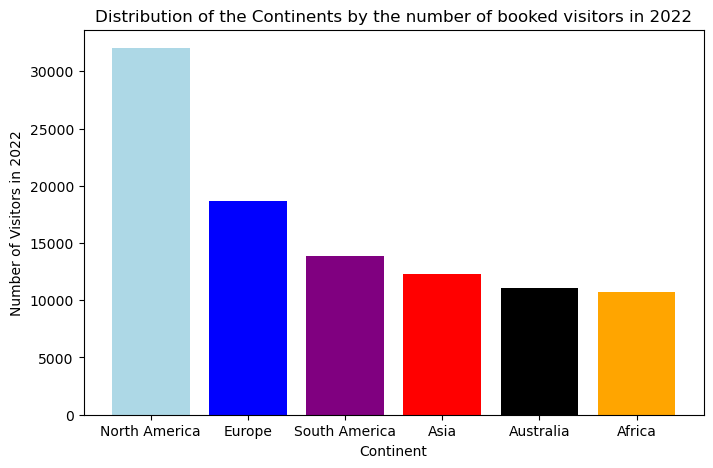

In [48]:
plt.figure(figsize = (8, 5))
my_color = ['lightblue', 'blue', 'purple', 'red', 'black', "orange"]
plt.bar(my_df["Continents"].unique(), my_df["Continents"].value_counts(), color = my_color)
plt.title("Distribution of the Continents by the number of booked visitors in 2022")
plt.xlabel("Continent")
plt.ylabel("Number of Visitors in 2022")
plt.show;

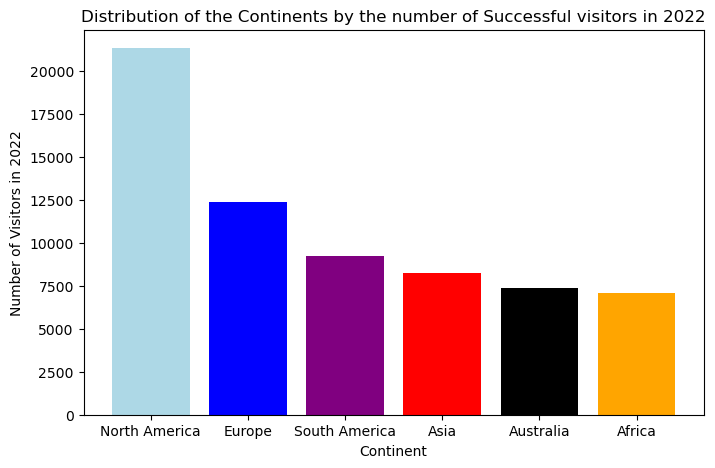

In [49]:
plt.figure(figsize = (8, 5))
my_color = ['lightblue', 'blue', 'purple', 'red', 'black', "orange"]
plt.bar(my_df2["Continents"].unique(), my_df2["Continents"].value_counts(), color = my_color)
plt.title("Distribution of the Continents by the number of Successful visitors in 2022")
plt.xlabel("Continent")
plt.ylabel("Number of Visitors in 2022")
plt.show;

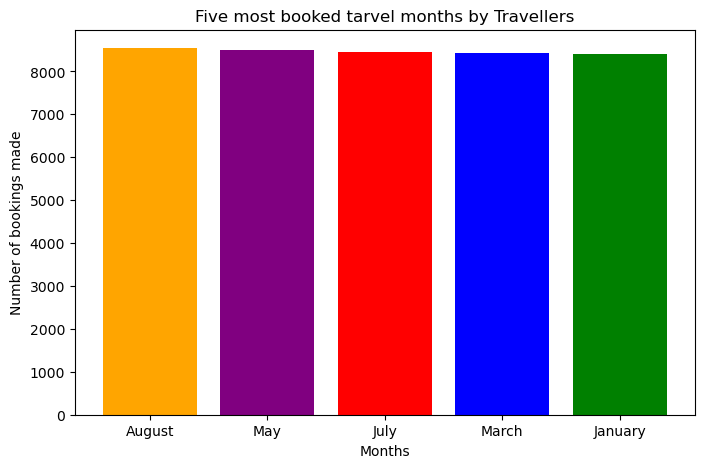

In [50]:
mm = my_df["Month"].value_counts().sort_values(ascending = False).head()
month_df = pd.DataFrame(mm)
plt.figure(figsize = (8, 5))
my_color2 = ["orange", "purple", "red", "blue", "green"]
plt.bar(month_df["Month"].index, month_df["Month"].values, color = my_color2)
plt.title("Five most booked tarvel months by Travellers")
plt.xlabel("Months")
plt.ylabel("Number of bookings made")
plt.show;

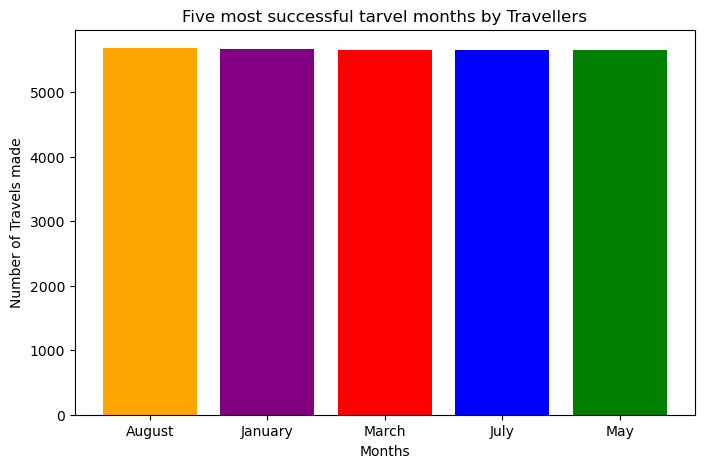

In [51]:
mb = my_df2["Month"].value_counts().sort_values(ascending = False).head()
month_df1 = pd.DataFrame(mb)
plt.figure(figsize = (8, 5))
my_color2 = ["orange", "purple", "red", "blue", "green"]
plt.bar(month_df1["Month"].index, month_df1["Month"].values, color = my_color2)
plt.title("Five most successful tarvel months by Travellers")
plt.xlabel("Months")
plt.ylabel("Number of Travels made")
plt.show;

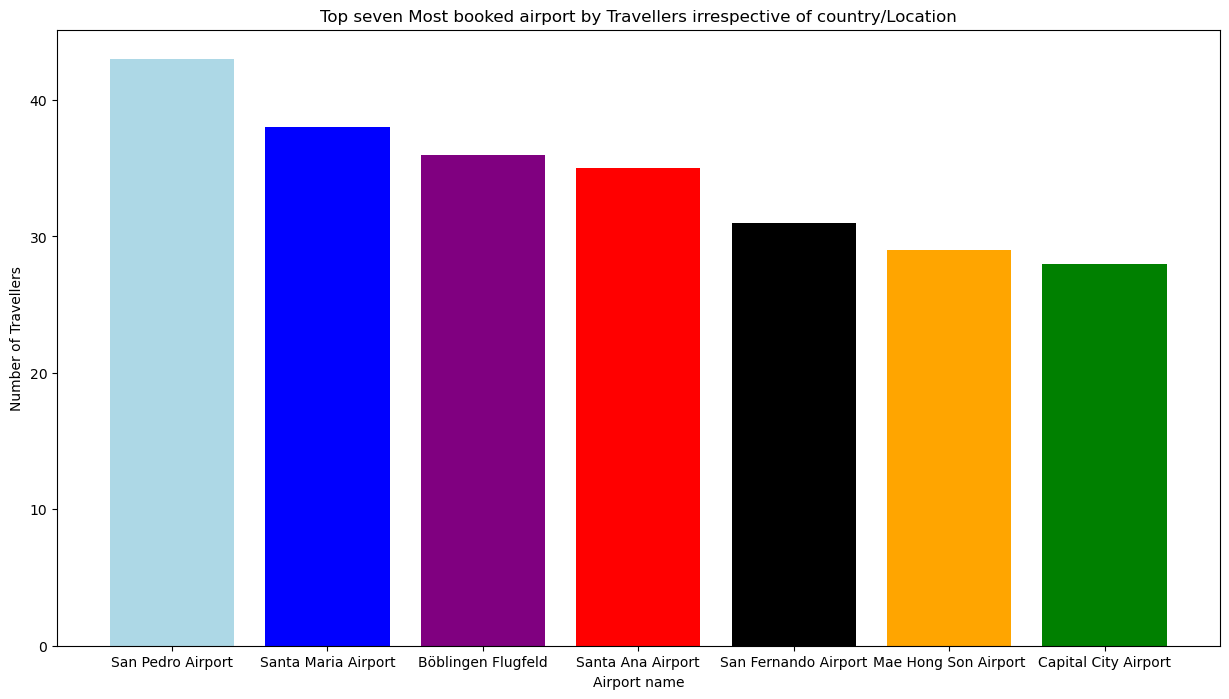

In [52]:
mn = my_df["Airport Name"].value_counts().sort_values(ascending = False).head(7)
airport_df = pd.DataFrame(mn)
plt.figure(figsize = (15, 8))
my_color3 = ['lightblue', 'blue', 'purple', 'red', 'black', "orange", "green"]
plt.bar(airport_df["Airport Name"].index, airport_df["Airport Name"].values, color = my_color3)
plt.title("Top seven Most booked airport by Travellers irrespective of country/Location")
plt.xlabel("Airport name")
plt.ylabel("Number of Travellers")
plt.show;

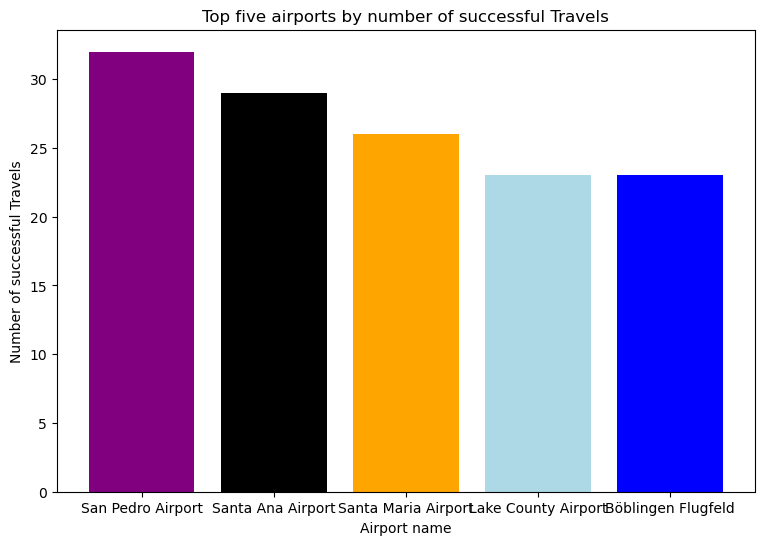

In [53]:
ma = my_df2["Airport Name"].value_counts().sort_values(ascending = False).head(5)
airport_df1 = pd.DataFrame(ma)
plt.figure(figsize = (9, 6))
my_color6 = ['purple', 'black', "orange", 'lightblue', 'blue']
plt.bar(airport_df1["Airport Name"].index, airport_df1["Airport Name"].values, color = my_color6)
plt.title("Top five airports by number of successful Travels")
plt.xlabel("Airport name")
plt.ylabel("Number of successful Travels")
plt.show;

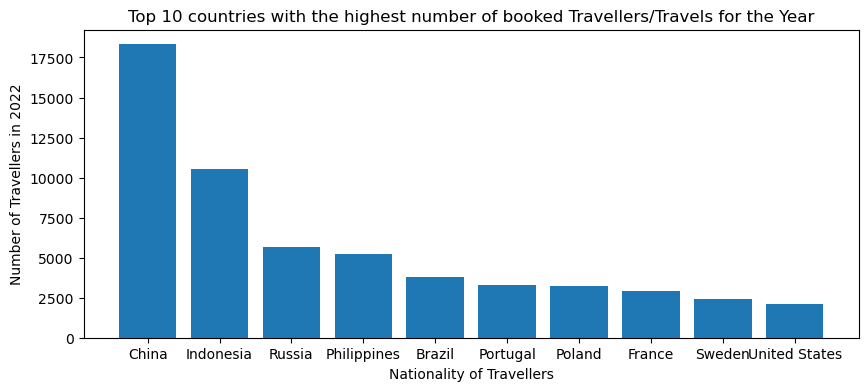

In [54]:
mc = my_df["Nationality"].value_counts().sort_values(ascending = False).head(10)
nation_df = pd.DataFrame(mc)
plt.figure(figsize = (10, 4))
plt.bar(nation_df["Nationality"].index, nation_df["Nationality"].values)
plt.title("Top 10 countries with the highest number of booked Travellers/Travels for the Year")
plt.xlabel("Nationality of Travellers")
plt.ylabel("Number of Travellers in 2022")
plt.show;

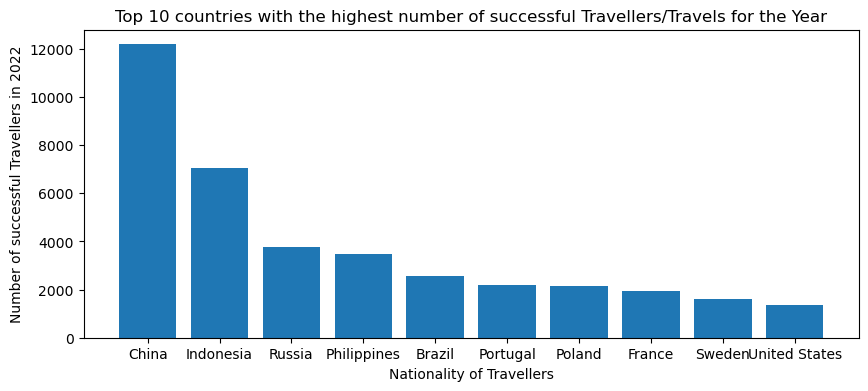

In [55]:
md = my_df2["Nationality"].value_counts().sort_values(ascending = False).head(10)
nation_df1 = pd.DataFrame(md)
plt.figure(figsize = (10, 4))
plt.bar(nation_df1["Nationality"].index, nation_df1["Nationality"].values)
plt.title("Top 10 countries with the highest number of successful Travellers/Travels for the Year")
plt.xlabel("Nationality of Travellers")
plt.ylabel("Number of successful Travellers in 2022")
plt.show;

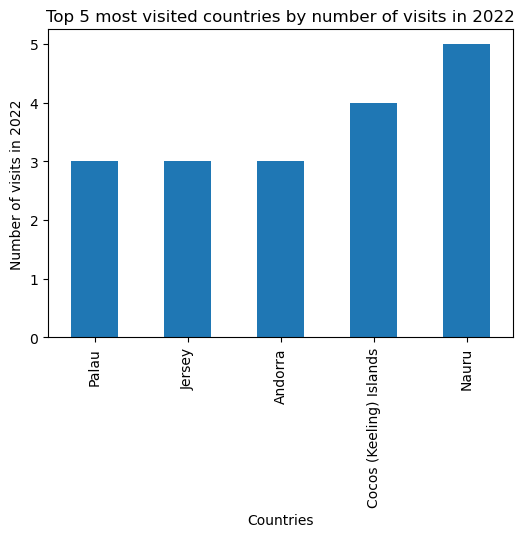

In [56]:
top_countries = my_df2["Country Name"].value_counts().sort_values(ascending = True).head()

plt.figure(figsize = (6, 4))
top_countries.plot(kind = "bar")
plt.title("Top 5 most visited countries by number of visits in 2022")
plt.xlabel("Countries")
plt.ylabel("Number of visits in 2022")
plt.show;

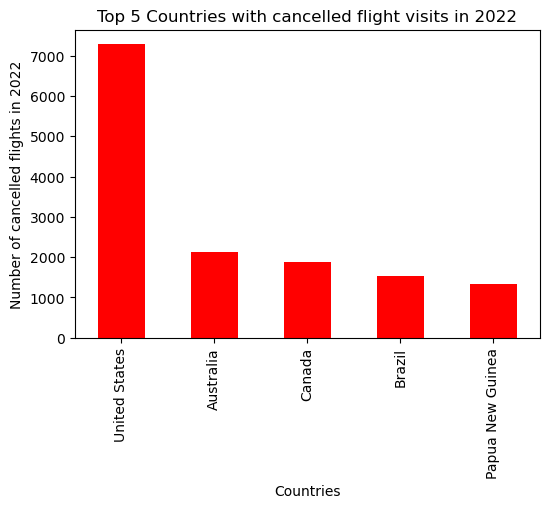

In [57]:
f_countries = my_df3["Country Name"].value_counts().sort_values(ascending = False).head()

plt.figure(figsize = (6, 4))
f_countries.plot(kind = "bar", color = "red")
plt.title("Top 5 Countries with cancelled flight visits in 2022")
plt.xlabel("Countries")
plt.ylabel("Number of cancelled flights in 2022")
plt.show;

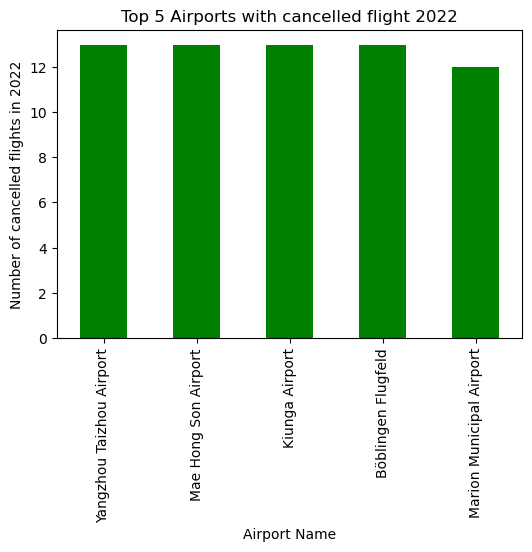

In [58]:
f_airports = my_df3["Airport Name"].value_counts().sort_values(ascending = False).head()

plt.figure(figsize = (6, 4))
f_airports.plot(kind = "bar", color = "green")
plt.title("Top 5 Airports with cancelled flight 2022")
plt.xlabel("Airport Name")
plt.ylabel("Number of cancelled flights in 2022")
plt.show;

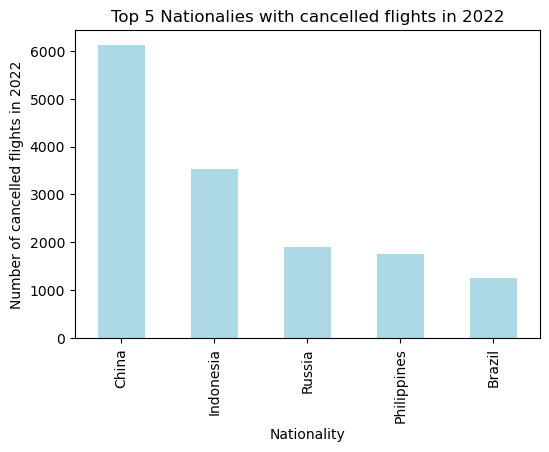

In [59]:
f_nationality = my_df3["Nationality"].value_counts().sort_values(ascending = False).head()

plt.figure(figsize = (6, 4))
f_nationality.plot(kind = "bar", color = "lightblue")
plt.title("Top 5 Nationalies with cancelled flights in 2022")
plt.xlabel("Nationality")
plt.ylabel("Number of cancelled flights in 2022")
plt.show;

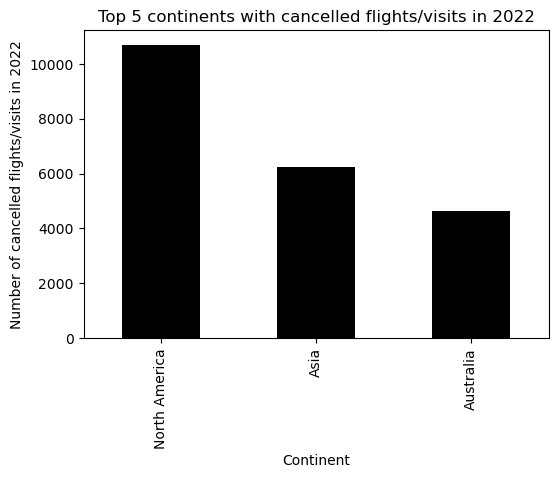

In [60]:
f_continents = my_df3["Continents"].value_counts().sort_values(ascending = False).head(3)

plt.figure(figsize = (6, 4))
f_continents.plot(kind = "bar", color = "black")
plt.title("Top 5 continents with cancelled flights/visits in 2022")
plt.xlabel("Continent")
plt.ylabel("Number of cancelled flights/visits in 2022")
plt.show;

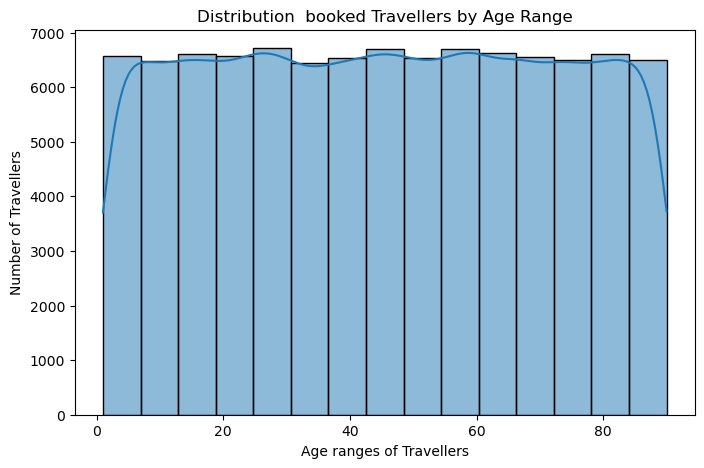

In [61]:
plt.figure(figsize=(8, 5))
sns.histplot(my_df["Age"], bins=15, kde=True)
plt.xlabel("Age ranges of Travellers")
plt.ylabel("Number of Travellers")
plt.title("Distribution  booked Travellers by Age Range")
plt.show();

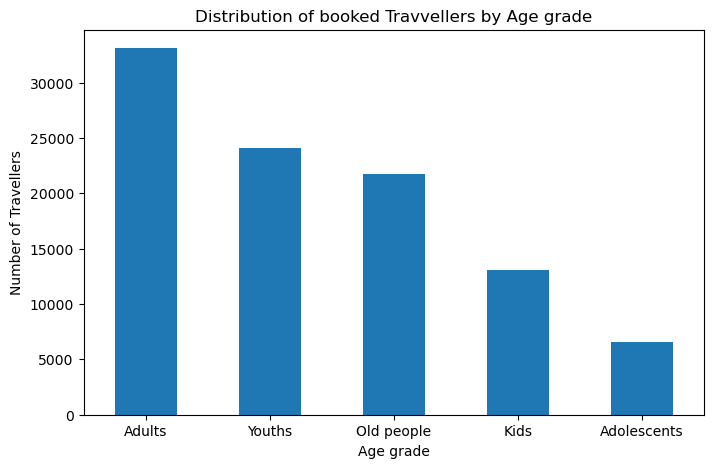

In [62]:
bins = [0, 12, 18, 40, 70, 95] 
labels = ['Kids', 'Adolescents', 'Youths', 'Adults', "Old people"] 
my_df['Age grade'] = pd.cut(my_df['Age'], bins=bins, labels=labels)
age_number = my_df['Age grade'].value_counts()

plt.figure(figsize=(8, 5))
age_number.plot(kind='bar', rot=0)
plt.xlabel("Age grade")
plt.ylabel("Number of Travellers")
plt.title("Distribution of booked Travvellers by Age grade")
plt.show()

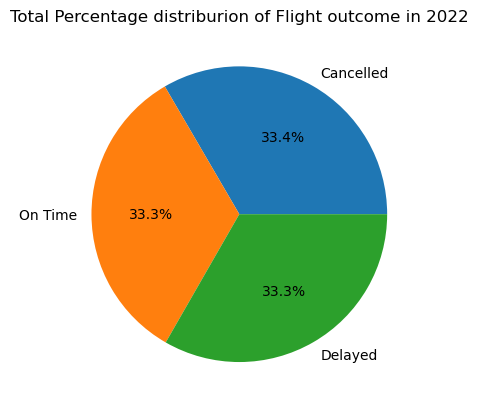

In [63]:
plt.pie(my_df["Flight Status"].value_counts().sort_values(ascending = False), labels = my_df['Flight Status'].value_counts().sort_values(ascending = False).index, autopct = "%1.1f%%")
plt.title("Total Percentage distriburion of Flight outcome in 2022")
plt.show();

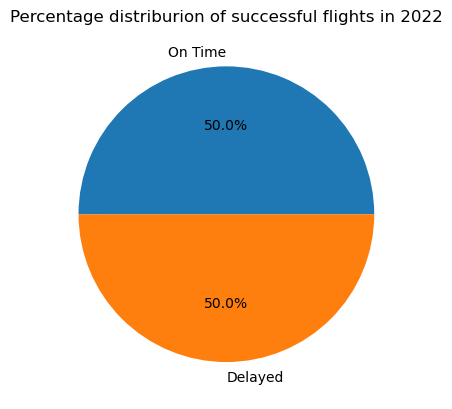

In [64]:
plt.pie(my_df2["Flight Status"].value_counts().sort_values(ascending = False), labels = my_df2['Flight Status'].value_counts().sort_values(ascending = False).index, autopct = "%1.1f%%")
plt.title("Percentage distriburion of successful flights in 2022")
plt.show();

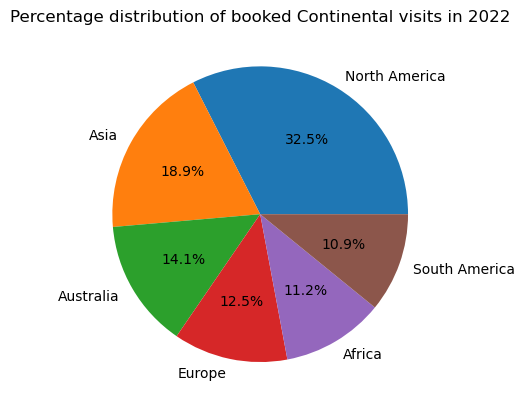

In [65]:
plt.pie(my_df["Continents"].value_counts().sort_values(ascending = False), labels = my_df['Continents'].value_counts().sort_values(ascending = False).index, autopct = "%1.1f%%")
plt.title("Percentage distribution of booked Continental visits in 2022")
plt.show();

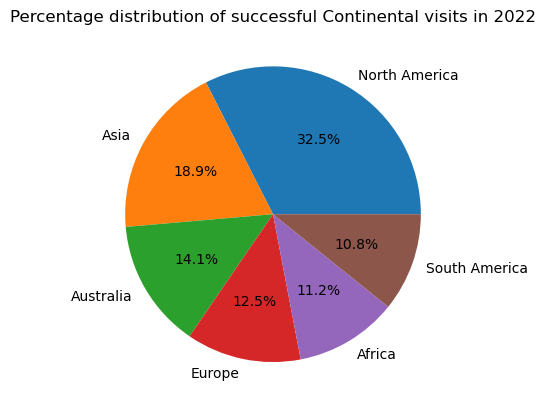

In [66]:
plt.pie(my_df2["Continents"].value_counts().sort_values(ascending = False), labels = my_df2['Continents'].value_counts().sort_values(ascending = False).index, autopct = "%1.1f%%")
plt.title("Percentage distribution of successful Continental visits in 2022")
plt.show();

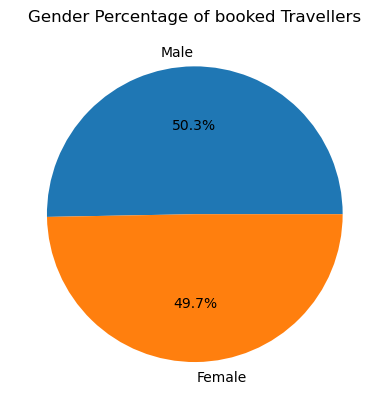

In [67]:
plt.pie(my_df["Gender"].value_counts(), labels = my_df['Gender'].value_counts().sort_values(ascending = False).index, autopct = "%1.1f%%")
plt.title("Gender Percentage of booked Travellers")
plt.show();

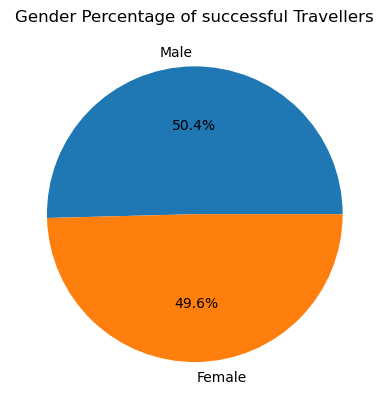

In [68]:
plt.pie(my_df2["Gender"].value_counts(), labels = my_df2['Gender'].value_counts().sort_values(ascending = False).index, autopct = "%1.1f%%")
plt.title("Gender Percentage of successful Travellers")
plt.show();

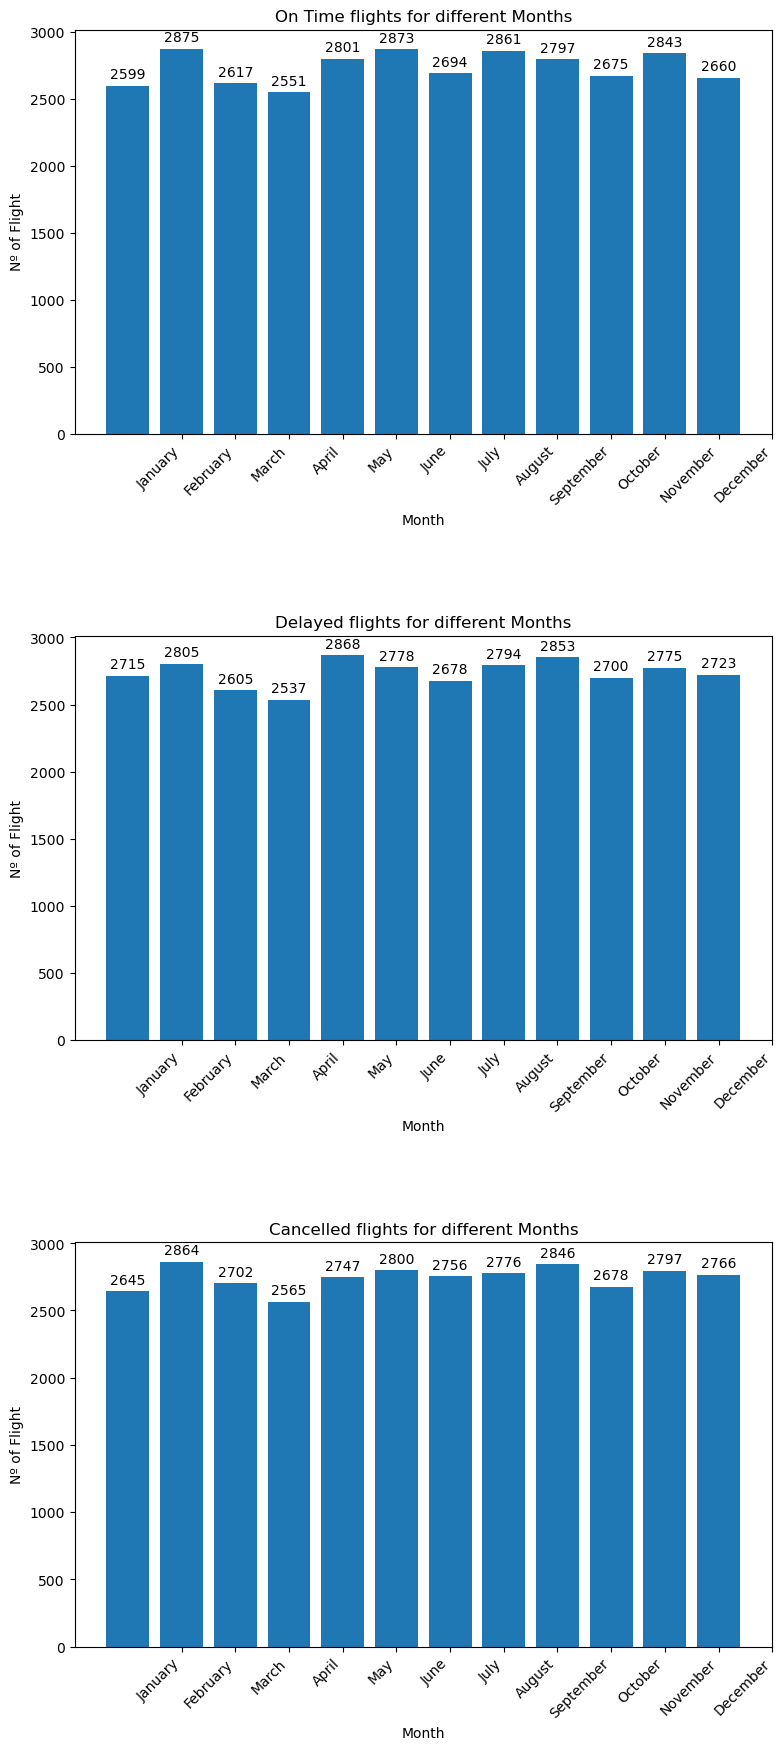

In [69]:
status_unique = my_df['Flight Status'].unique()
# To create Subplots
num_rows = len(status_unique)
fig, axs = plt.subplots(num_rows, 1, figsize=(9, 7 * num_rows), sharex=False,gridspec_kw={'hspace': 0.5})
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i, status in enumerate(status_unique):
    f_status = my_df[my_df['Flight Status'] == status]
    f_month = f_status.groupby(f_status['Month'])['Flight Status'].count()
    bars = axs[i].bar(f_month.index, f_month.values)
    axs[i].set_title(f'{status} flights for different Months')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Nº of Flight')
    axs[i].set_xticks(range(1, 13))
    axs[i].set_xticklabels(labels, rotation=45, ha='right')  # Set labels and rotation
    for bar in bars:
        height = bar.get_height()
        axs[i].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [70]:
#Change the month from string to int so you can split into bins
my_df["Month"] = my_df["Month"].str.replace("October", "10")
my_df["Month"] = my_df["Month"].str.replace("November", "11")
my_df["Month"] = my_df["Month"].str.replace("December", "12")
my_df["Month"] = my_df["Month"].str.replace("January", "1")
my_df["Month"] = my_df["Month"].str.replace("February", "2")
my_df["Month"] = my_df["Month"].str.replace("March", "3")
my_df["Month"] = my_df["Month"].str.replace("April", "4")
my_df["Month"] = my_df["Month"].str.replace("May", "5")
my_df["Month"] = my_df["Month"].str.replace("June", "6")
my_df["Month"] = my_df["Month"].str.replace("July", "7")
my_df["Month"] = my_df["Month"].str.replace("August", "8")
my_df["Month"] = my_df["Month"].str.replace("September", "9")
my_df["Month"] = my_df["Month"].astype(int)

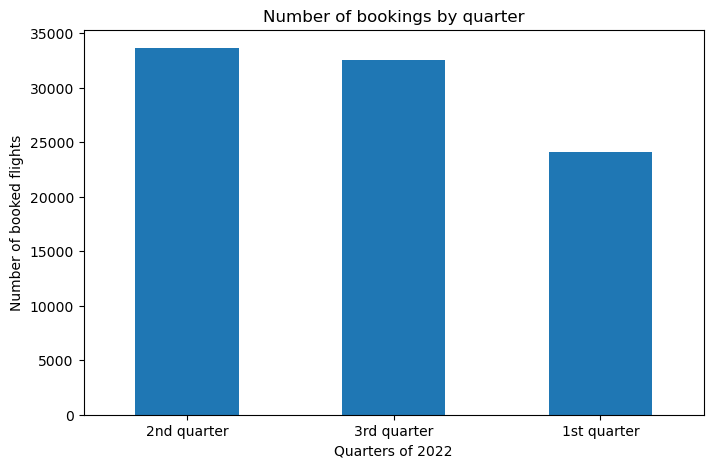

In [71]:
#Now plot the quarters in bins and display the number of visits per quarter
bins1 = [1, 4, 8, 12] 
labels1 = ["1st quarter", "2nd quarter", "3rd quarter"] 
my_df["Month"] = pd.cut(my_df['Month'], bins=bins1, labels=labels1)
quarter_number = my_df["Month"].value_counts()
plt.figure(figsize=(8, 5))
quarter_number.plot(kind='bar', rot=0)
plt.xlabel("Quarters of 2022")
plt.ylabel("Number of booked flights")
plt.title("Number of bookings by quarter")
plt.show;

#                                      THE END
#                             `(CODE APRIL 2024)`
###                              THANK YOU PROMISE EKEH, You are valued